<a href="https://colab.research.google.com/github/hruthikgithubrit/BharatIntern_Task01/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the csv file.

In [ ]:
data = pd.read_csv("housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Data exploration

In [ ]:
data.dropna(inplace=True)

This is gonna return a dataframe with non-null values. we can see from data.info() total_bedrooms missing some value.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


say that x is actually the data frame without the target variables so we gonna drop the target variable which is "median_house_value".
y is gonna be the opposite i.e target value "median_house_value".

In [ ]:
from sklearn.model_selection import train_test_split
#train test
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

Now we are going to create testing (or) evaluation data set. we are not going to touch that data set untill our model training is done.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now we'll try to find correlations between x_train and y_train.

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12244,-116.98,33.74,25.0,4952.0,1062.0,1589.0,1024.0,1.8446,INLAND,85700.0
17188,-122.33,37.39,52.0,573.0,102.0,232.0,92.0,6.2263,NEAR OCEAN,500001.0
11022,-117.83,33.83,23.0,2775.0,547.0,1226.0,510.0,3.6707,<1H OCEAN,231400.0
11303,-117.95,33.78,9.0,3553.0,1035.0,2017.0,986.0,2.9726,<1H OCEAN,133800.0
18113,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,<1H OCEAN,341400.0
...,...,...,...,...,...,...,...,...,...,...
19595,-120.89,37.59,33.0,1016.0,206.0,617.0,209.0,2.1510,INLAND,195800.0
11041,-117.81,33.82,22.0,2898.0,335.0,1057.0,324.0,10.8111,<1H OCEAN,500001.0
17343,-120.41,34.86,15.0,978.0,187.0,407.0,182.0,4.3750,<1H OCEAN,158000.0
4202,-118.23,34.11,33.0,2612.0,646.0,2496.0,606.0,3.1330,<1H OCEAN,156000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

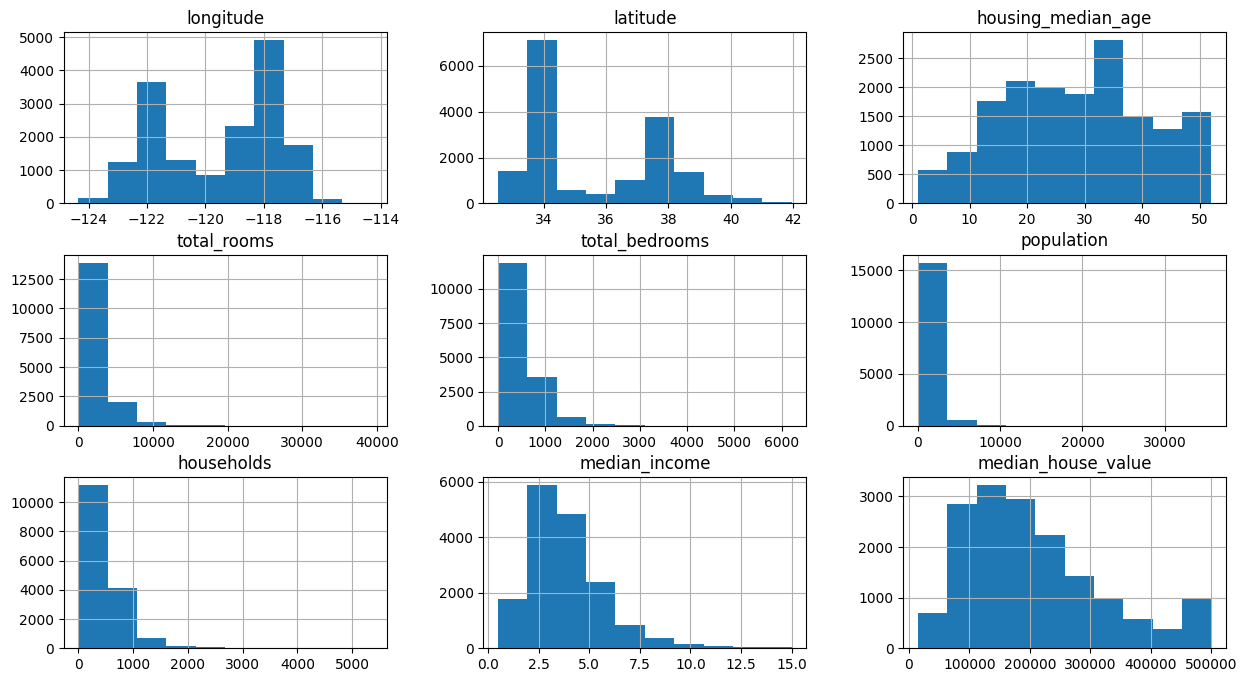

In [ ]:
#representing the data in histograms
train_data.hist(figsize=(15,8))
#this plot a graph btw every feature vector and our target value i.e median_house_value

<ipython-input-262-fb42c0108a83>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()
<ipython-input-262-fb42c0108a83>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

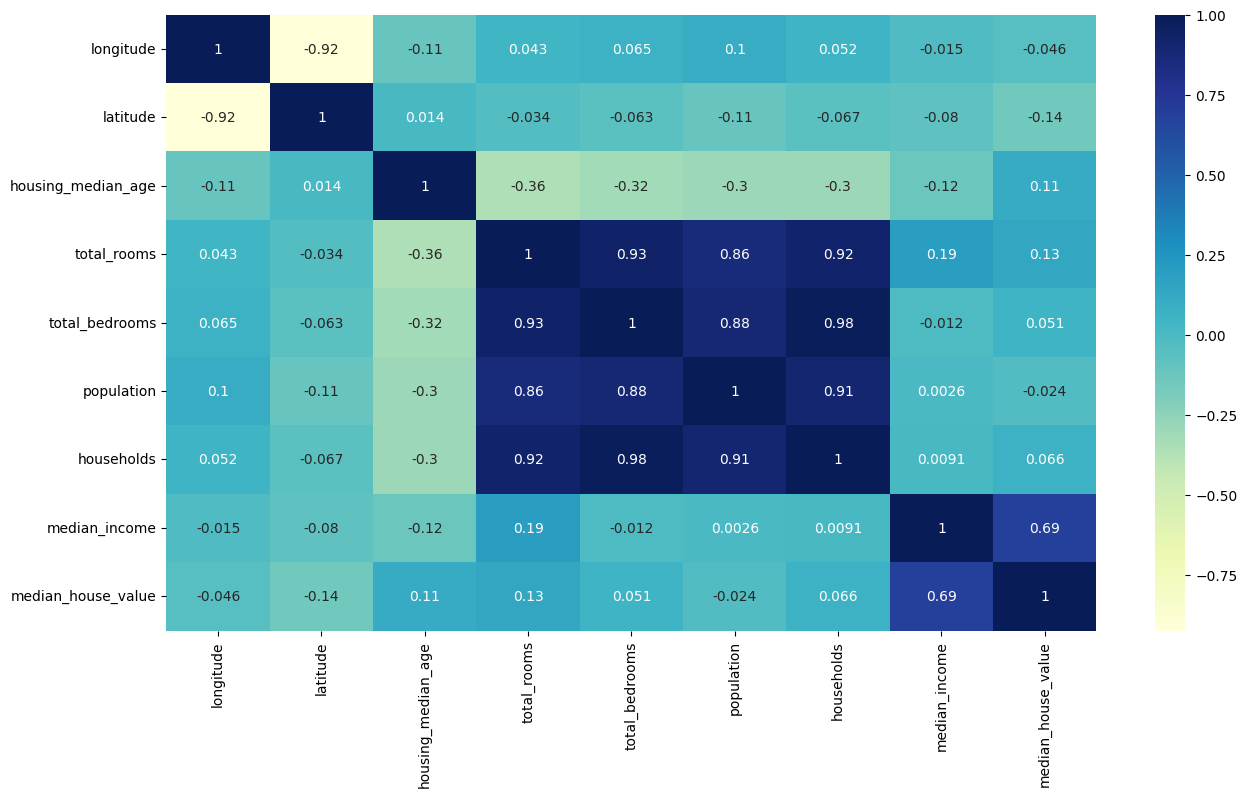

In [ ]:
#we will produce a heatmap to understand the correlaton (visualize a correlation matrix)
train_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Data Preprocessing.

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

we are doing this to attain guassian bell curve(using of log).

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

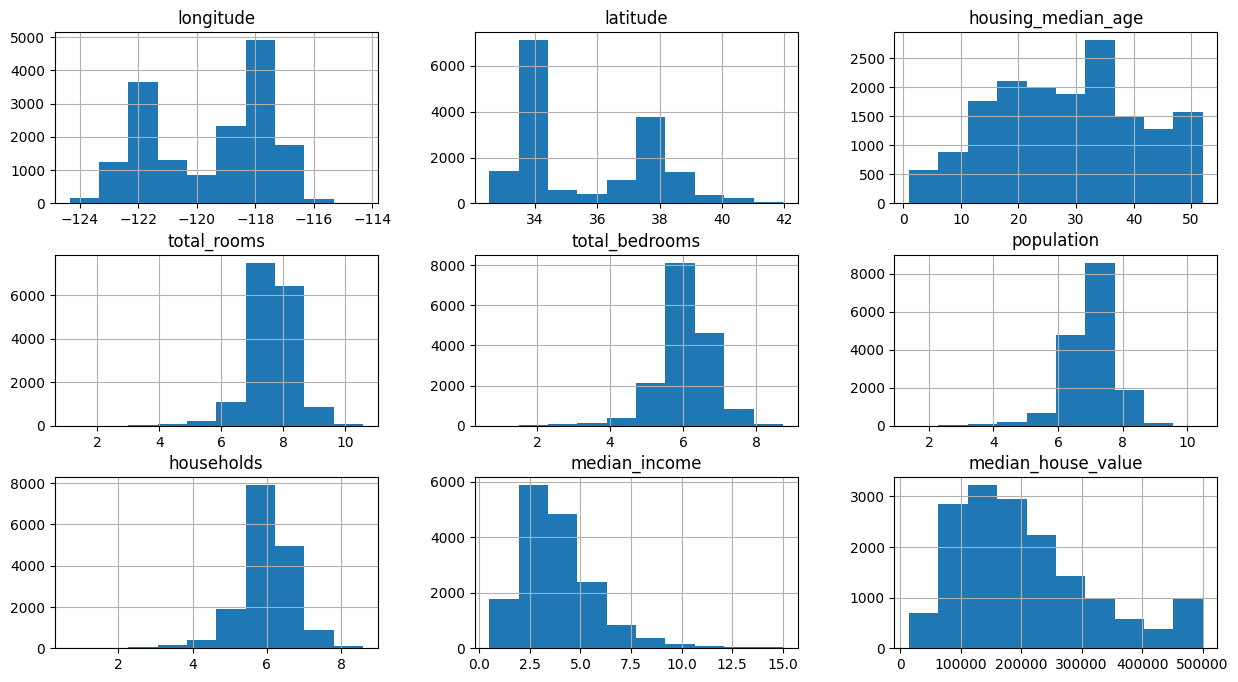

In [ ]:
train_data.hist(figsize=(15,8))

Now we are going to convert alphabetical values to numerical because our model can interpret only nummerical values.
->Now we are going to convert ocean_proximity vector answers into a numerical form by assigning them numbers.

In [ ]:
train_data.ocean_proximity.value_counts()
#we got five different values so we will assign binary numbers to it just like yes or no.


<1H OCEAN     7231
INLAND        5164
NEAR OCEAN    2115
NEAR BAY      1832
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12244,0,1,0,0,0
17188,0,0,0,0,1
11022,1,0,0,0,0
11303,1,0,0,0,0
18113,1,0,0,0,0
...,...,...,...,...,...
19595,0,1,0,0,0
11041,1,0,0,0,0
17343,1,0,0,0,0
4202,1,0,0,0,0


In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12244,-116.98,33.74,25.0,8.507749,6.968850,7.371489,6.932448,1.8446,85700.0,0,1,0,0,0
17188,-122.33,37.39,52.0,6.352629,4.634729,5.451038,4.532599,6.2263,500001.0,0,0,0,0,1
11022,-117.83,33.83,23.0,7.928766,6.306275,7.112327,6.236370,3.6707,231400.0,1,0,0,0,0
11303,-117.95,33.78,9.0,8.175829,6.943122,7.609862,6.894670,2.9726,133800.0,1,0,0,0,0
18113,-122.02,37.31,34.0,7.874739,6.073045,7.171657,6.068426,6.0830,341400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19595,-120.89,37.59,33.0,6.924612,5.332719,6.426488,5.347108,2.1510,195800.0,0,1,0,0,0
11041,-117.81,33.82,22.0,7.972121,5.817111,6.964136,5.783825,10.8111,500001.0,1,0,0,0,0
17343,-120.41,34.86,15.0,6.886532,5.236442,6.011267,5.209486,4.3750,158000.0,1,0,0,0,0
4202,-118.23,34.11,33.0,7.868254,6.472346,7.822845,6.408529,3.1330,156000.0,1,0,0,0,0


<Axes: >

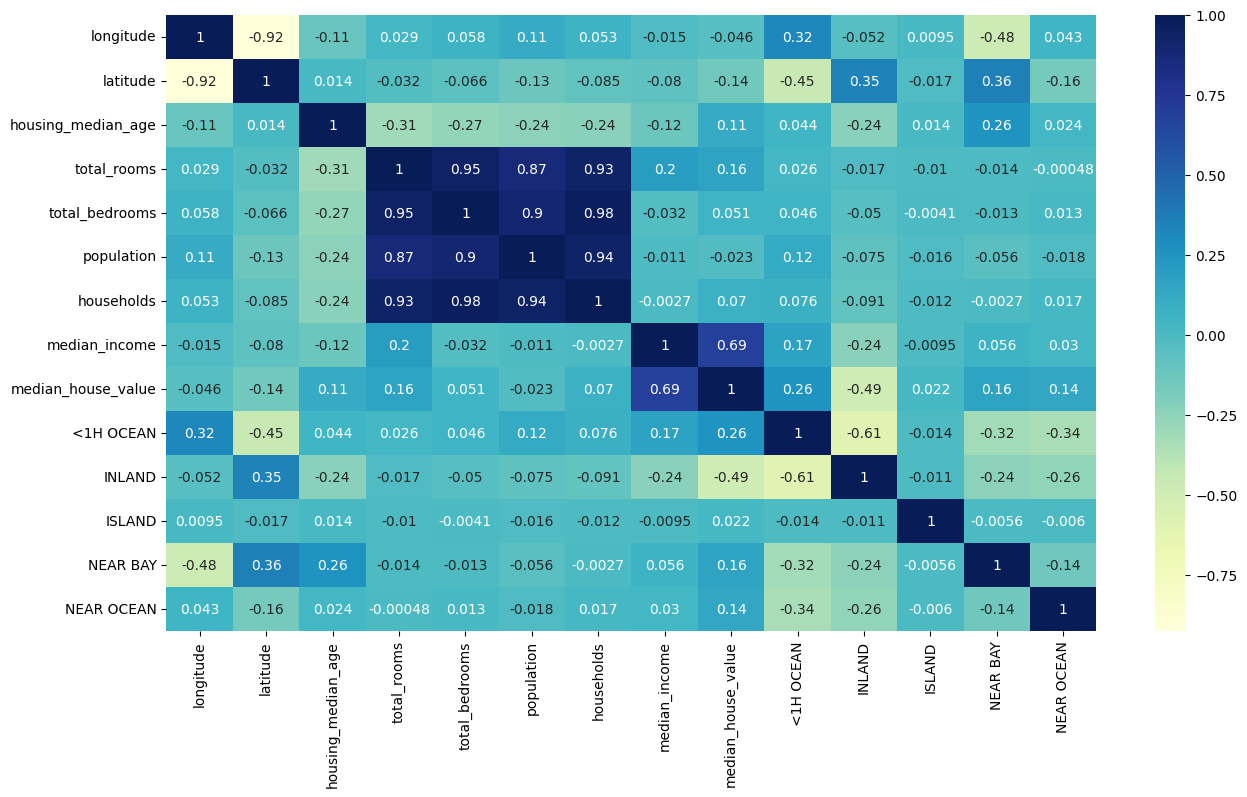

In [ ]:
#we will find correlation with the new added feature vectors(columns)
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

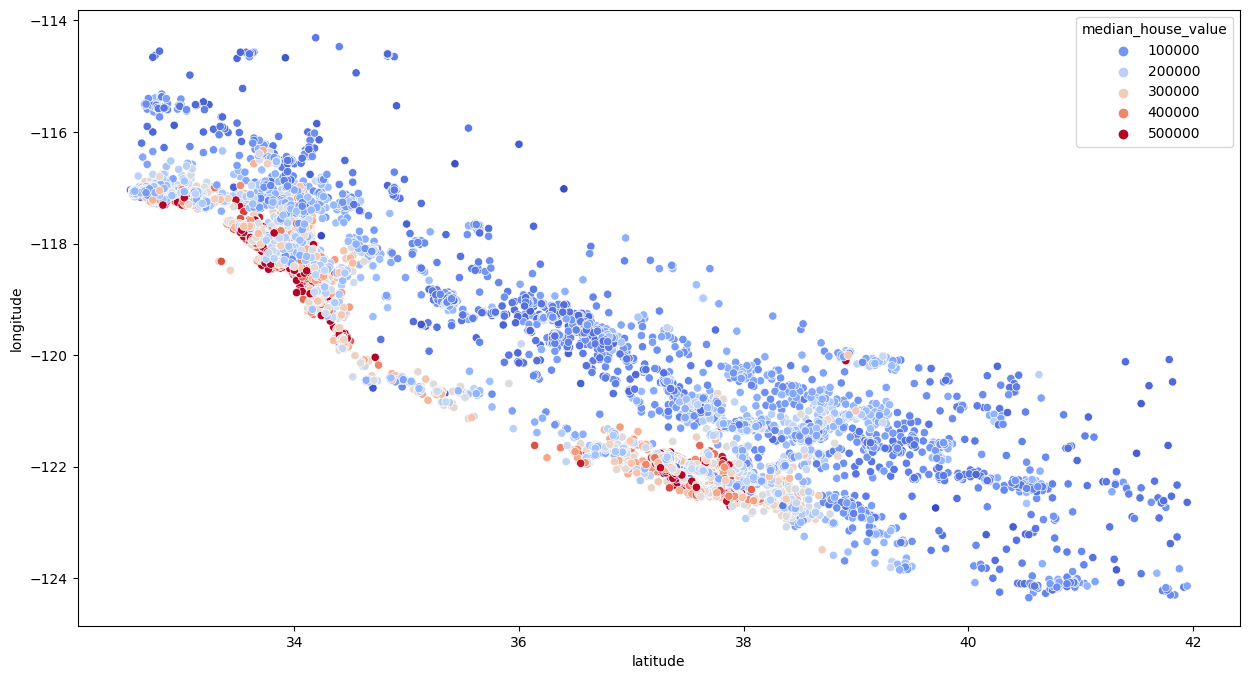

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="longitude", x="latitude", data=train_data, hue="median_house_value", palette="coolwarm")

the graph tells us most of the houses near the cost are expensive.

Feature Engineering.

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<Axes: >

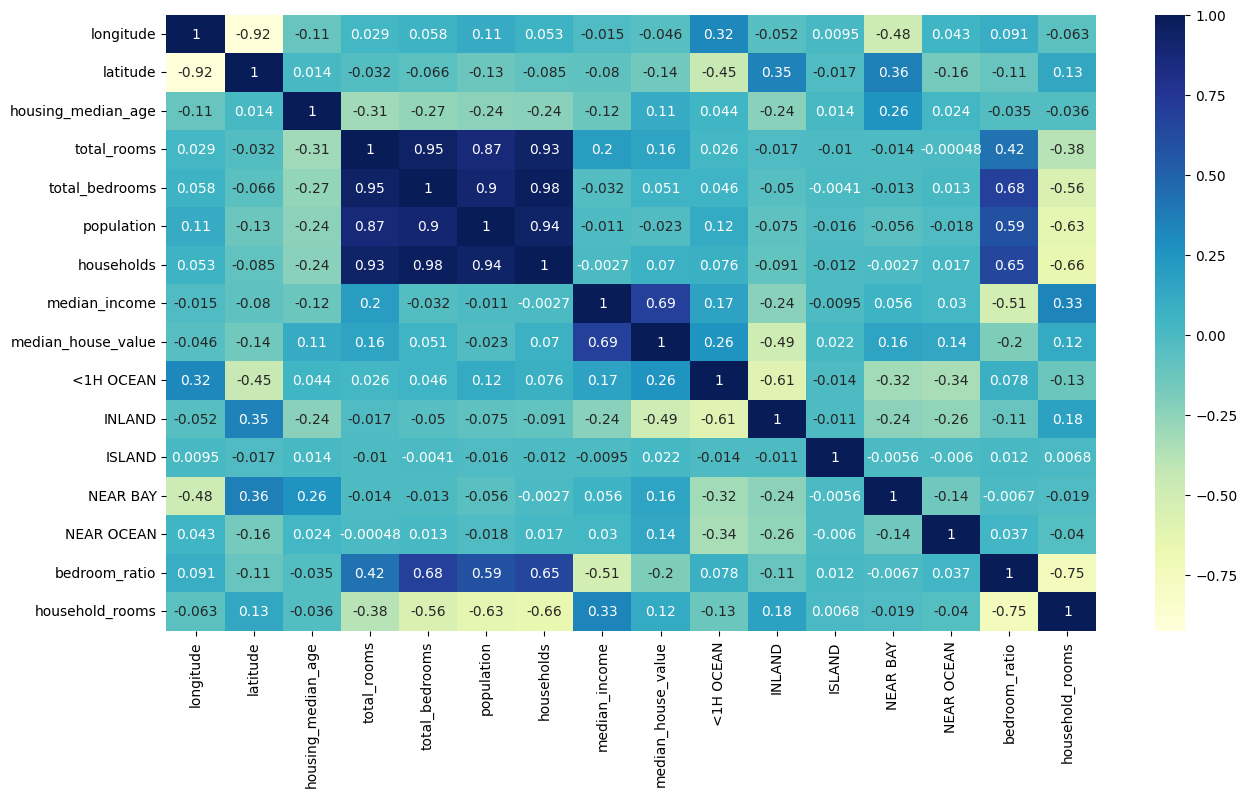

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Model (Linear regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
#from IPython.testing import test
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10958,-117.90,33.76,26.0,7.893199,6.555357,8.090402,6.530878,3.6953,176800.0,1,0,0,0,0,0.830507,1.208597
18075,-122.03,37.27,32.0,8.378161,6.470800,7.347300,6.413459,7.8279,500001.0,1,0,0,0,0,0.772341,1.306340
3988,-118.65,34.18,27.0,7.492203,5.828946,6.924612,5.789960,4.9250,240300.0,1,0,0,0,0,0.778002,1.293999
5920,-118.45,34.28,36.0,7.864420,6.459904,7.930566,6.431331,2.7155,149800.0,1,0,0,0,0,0.821409,1.222829
17561,-121.89,37.32,43.0,7.008505,5.488938,6.890609,5.332719,2.1149,184900.0,1,0,0,0,0,0.783182,1.314246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,-117.31,34.15,7.0,8.656607,7.176255,7.855157,7.045777,3.3281,122200.0,0,1,0,0,0,0.828992,1.228624
2984,-119.01,35.34,36.0,6.881411,5.393628,6.419995,5.236442,1.5625,46700.0,0,1,0,0,0,0.783797,1.314139
16561,-121.40,37.74,20.0,7.903596,6.169611,7.120444,6.163315,4.1500,322400.0,0,1,0,0,0,0.780608,1.282361
12984,-121.30,38.67,20.0,7.118826,5.342334,6.476972,5.356586,4.8523,143000.0,0,1,0,0,0,0.750452,1.328986


In [ ]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
x_test_s = scaler.transform(x_test)

In [ ]:
reg.score(x_test_s, y_test)

0.6552222819232238

Random forest model

In [ ]:

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test_s, y_test)

0.8017708579294582

In [ ]:
from sklearn.model_selection import GridSearchCV
# used for cross validation
#param_grid does cross validation on every possible combination
forest = RandomForestRegressor()
para_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max-depth":[None, 4, 8]
}
grid_search = GridSearchCV(forest,para_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train);

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.8028521294653612